## Imports :

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings as ws
import matplotlib.pyplot as plt
from scipy.stats import randint, expon
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Loading the data :

In [2]:
df = pd.read_csv('Dataset Folder/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration :

In [4]:
# Number of Diabetic datapoints and Non-diabetic datapoints :-

diabetic_dataframe = df[df['Outcome']==1]

non_diabetic_dataframe = df[df['Outcome']==0]

print(f'Number of Diabetic datapoints/rows in the dataset are : {diabetic_dataframe.shape[0]}')
print(f'Number of Non-Diabetic datapoints/rows in the dataset are : {non_diabetic_dataframe.shape[0]}')

Number of Diabetic datapoints/rows in the dataset are : 268
Number of Non-Diabetic datapoints/rows in the dataset are : 500


In [5]:
# Renaming the column names for convenience, dealing with the dataframe :-

df.rename(columns={
                                     "Pregnancies": "preg", 
                                     "Glucose": "glu", 
                                     "BloodPressure":"bp", 
                                     "SkinThickness":"skinThickness",
                                     "Insulin":"insulin", 
                                     "BMI":"bmi",
                                     "DiabetesPedigreeFunction":"dpf",
                                     "Age":"age", 
                                     "Outcome":"outcome"}, inplace=True
                           )


df

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Description of the dataset :-

df.describe() 

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above description we know that, there are more than half of the columns with zero as a value in them. We'll evaluate below the number of zeroes that they have. And, also use different techniques of imputation to make the prediction performance better.

In [7]:
# Let's have a look at the null('NaN') values in the dataframe :-

for column in df.columns:
    print(f'Number of NaN(null) values in \'{column}\' column are : \
    {df[column].isnull().sum()}')

Number of NaN(null) values in 'preg' column are :     0
Number of NaN(null) values in 'glu' column are :     0
Number of NaN(null) values in 'bp' column are :     0
Number of NaN(null) values in 'skinThickness' column are :     0
Number of NaN(null) values in 'insulin' column are :     0
Number of NaN(null) values in 'bmi' column are :     0
Number of NaN(null) values in 'dpf' column are :     0
Number of NaN(null) values in 'age' column are :     0
Number of NaN(null) values in 'outcome' column are :     0


Now, we know there are no 'null' values in the entire dataframe. But, there are '0' values in the dataset and that value of '0' in columns apart from just 'preg' and 'outcome' are subject to performance change of the algorithm.(Since, that's missing information). Hence, we should find out the missing data in columns.

If, 'preg' and 'outcome' are having '0' values, then it is not missing information as there can be '0' pregnancies and non-diabetic patients which is indicated by '0'.

In [8]:
# Let's have a look at the number of  missing values in the dataframe

columns_missing_values = ['glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf']

def zeroes_in_columns(columns, dataframe):
    for missing_values_column in columns:
        print(f'Number of missing values in {missing_values_column} are : {len(dataframe[dataframe[missing_values_column]==0])}')
                

zeroes_in_columns(columns_missing_values, df)

Number of missing values in glu are : 5
Number of missing values in bp are : 35
Number of missing values in skinThickness are : 227
Number of missing values in insulin are : 374
Number of missing values in bmi are : 11
Number of missing values in dpf are : 0


### Let's find out correlation between every pairs of features in the dataset :

In [9]:
corr = df.corr()
corr

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age,outcome
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


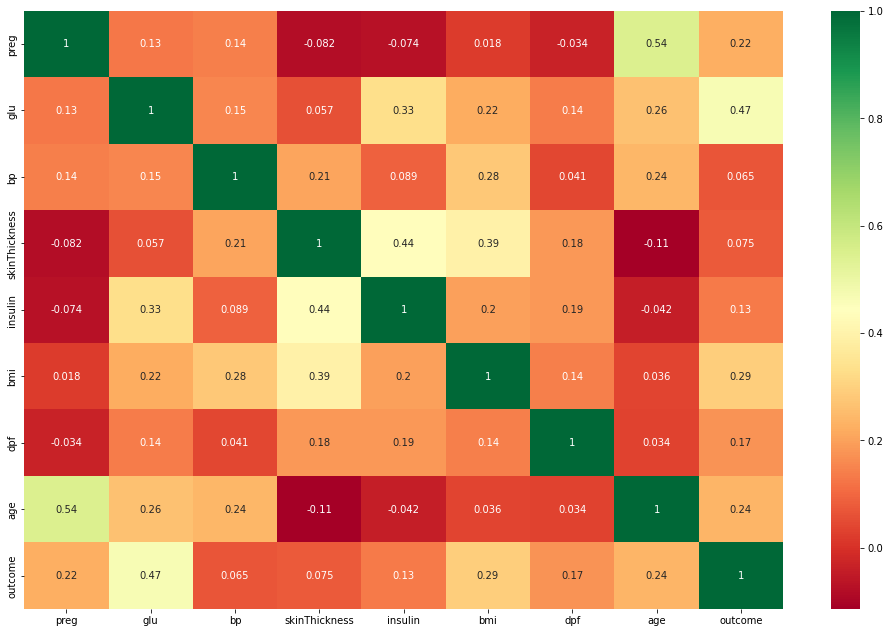

In [10]:
# Representing the above using heatmap :-

plt.figure(figsize = (17,11))

p = sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')

### Looking at the distributions of all the features :-

array([[<AxesSubplot:title={'center':'preg'}>,
        <AxesSubplot:title={'center':'glu'}>,
        <AxesSubplot:title={'center':'bp'}>],
       [<AxesSubplot:title={'center':'skinThickness'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'dpf'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'outcome'}>]], dtype=object)

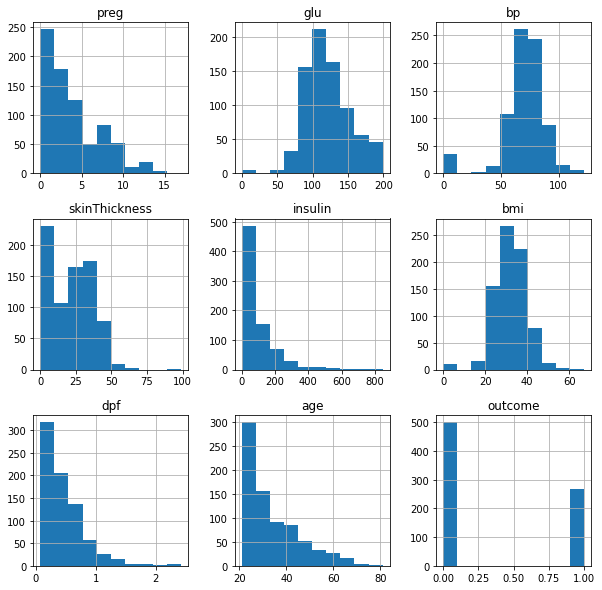

In [11]:
df.hist(figsize=(10,10))

In [12]:
ws.filterwarnings('ignore')

## Before any sort of manipulation of the missing data, let's apply the techniques and find out how well they help prediction.

In [13]:
# First of all splitting the dataset into training and testing :

X = df.iloc[:, :-1]

y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [14]:
print(f'There are {len(y_test[y_test==1])} diabetic & {len(y_test[y_test==0])} \
non-diabetic records in the test dataset.')

There are 85 diabetic & 146 non-diabetic records in the test dataset.


### We'll use the optimized hyperparameters for all the algorithms despite not manipulating the dataset in any manner. And, for that purpose, some functions defined below would become immensely useful :

Below is the function for GridSearchCV :-

In [15]:
def grid_search_cv(estimator,param_grid,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test):
    
    '''
    This function upon rendering a list with the estimator and its parameters for hypertuning,
    along with the X_train, y_train, X_test and y_test; performs GridSearchCV for selecting best set
    of parameters, thereafter fits X_train, y_train with the suggested set of best hyperparameters
    and prints the performance metrics.
    '''        
        
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5,
                                   scoring='accuracy')
        
    grid_search.fit(X_train, y_train)
        
    grid_search_best_estimator = grid_search.best_estimator_
        
    # Printing the best set of hyperparameters as per GridSearchCV.
    print(f'{grid_search_best_estimator} is the Best Estimator according to Exhaustive Hyperparameter search.')
        
        
    # Fitting the X_train with the best_estimator obtained and then testing X_test
    # to see how the performance is:
    grid_search_best_estimator.fit(X_train, y_train)
        
        
    y_pred = grid_search_best_estimator.predict(X_test)
        
    # Evaluating performance metrics :
    accuracy_score_ = accuracy_score(y_test, y_pred)
        
    precision_score_ = precision_score(y_test, y_pred)
        
    recall_score_ = recall_score(y_test, y_pred)
        
    f1_score_ = f1_score(y_test, y_pred)
    
    print()
        
    # Printing the performance metrics' results:
    print(f'{accuracy_score_*100}% is the accuracy score for the {estimator} using the best hyparameters suggested by GridSearchCV.')
        
    print(f'{precision_score_*100}% is the precision score for the {estimator} using the best hyparameters suggested by GridSearchCV.')
        
    print(f'{recall_score_*100}% is the recall score for the {estimator} using the best hyparameters suggested by GridSearchCV.')

    print(f'{f1_score_*100}% is the f1_score for the {estimator} using the best hyparameters suggested by GridSearchCV.')


Below is the function for RandimizedSearchCV :

In [16]:
def randomized_search_cv(estimator,param_grid,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test):
    
    '''
    This function upon rendering a list with the estimator and its parameters for hypertuning,
    along with the X_train, y_train, X_test and y_test; performs RandomizearchCV for selecting best set
    of parameters, thereafter fits X_train, y_train with the suggested set of best hyperparameters
    and prints the performance metrics.
    '''        
        
    randomized_search = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, cv=5,
                                   scoring='accuracy', n_iter=20)
        
    randomized_search.fit(X_train, y_train)
        
    randomized_search_best_estimator = randomized_search.best_estimator_
        
    # Printing the best set of hyperparameters as per GridSearchCV.
    print(f'{randomized_search_best_estimator} is the Best Estimator according to Randomized Hyperparameter search.')
        
        
    # Fitting the X_train with the best_estimator obtained and then testing X_test
    # to see how the performance is:
    randomized_search_best_estimator.fit(X_train, y_train)
        
        
    y_pred = randomized_search_best_estimator.predict(X_test)
        
    # Evaluating performance metrics :
    accuracy_score_ = accuracy_score(y_test, y_pred)
        
    precision_score_ = precision_score(y_test, y_pred)
        
    recall_score_ = recall_score(y_test, y_pred)
        
    f1_score_ = f1_score(y_test, y_pred)
    
    print()
        
    # Printing the performance metrics' results:
    print(f'{accuracy_score_*100}% is the accuracy score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')
        
    print(f'{precision_score_*100}% is the precision score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')
        
    print(f'{recall_score_*100}% is the recall score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')

    print(f'{f1_score_*100}% is the f1_score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')


## i.e. Before Anything :

### Naive-Bayes Classifier :-

In [17]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train, y_train)

y_pred = gnb_classifier.predict(X_test)

accuracy_score_gnb = accuracy_score(y_test, y_pred)

accuracy_score_gnb*100

78.35497835497836

In [18]:
gnb_classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

###  KNN Technique :-

In [19]:
neigh = KNeighborsClassifier(n_neighbors=17)

neigh.fit(X_train.values, y_train.values)

y_pred = neigh.predict(X_test.values)

knn_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{knn_accuracy_score}% is the accuracy score in percentage form with knn.")

78.78787878787878% is the accuracy score in percentage form with knn.


In [20]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}

#### Hyperparameter tuning for KNN :-

##### GridSearchCV (KNN)

In [21]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,25,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

grid_search_cv(neigh,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

KNeighborsClassifier(n_neighbors=13) is the Best Estimator according to Exhaustive Hyperparameter search.

77.48917748917748% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
77.04918032786885% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
55.294117647058826% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
64.38356164383562% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (KNN) :-

In [22]:
neigh = KNeighborsClassifier()

params_grid_dict = {
    # Increasing the range of n_neighbors to maybe find a better set of hyperparameters.
    'n_neighbors' : np.array([i for i in range(5,40,2)]), 
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

randomized_search_cv(neigh,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

KNeighborsClassifier(metric='euclidean', n_neighbors=31, weights='distance') is the Best Estimator according to Randomized Hyperparameter search.

76.62337662337663% is the accuracy score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
78.18181818181819% is the precision score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
50.588235294117645% is the recall score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
61.42857142857143% is the f1_score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.


### Logistic Regression :-

In [23]:
logistic_regression = LogisticRegression(max_iter=200)

logistic_regression.fit(X_train, y_train)

# Predicting the X_test datapoints :
y_pred = logistic_regression.predict(X_test)

logistic_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{logistic_accuracy_score}% is the accuracy score in percentage form with LogisticRegression.")

78.35497835497836% is the accuracy score in percentage form with LogisticRegression.


In [24]:
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter tuning for LogisticRegression :-

##### GridSearchCV (LogisticRegression)

In [25]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)     

LogisticRegression(C=1.623776739188721, solver='newton-cg') is the Best Estimator according to Exhaustive Hyperparameter search.

78.35497835497836% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
77.77777777777779% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
57.647058823529406% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
66.21621621621621% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (LogisticRegression)

In [26]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [40,50,70,80,100,1000,2500,5000, ],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

LogisticRegression(C=784.7599703514607, max_iter=40, solver='liblinear') is the Best Estimator according to Randomized Hyperparameter search.

78.35497835497836% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
77.77777777777779% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
57.647058823529406% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
66.21621621621621% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


### Decision Trees :-

In [27]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy_score_dt = accuracy_score(y_test, y_pred)*100

print(f"{accuracy_score_dt}% is the accuracy score in percentage form with DecisionTreesTechnique.")

70.995670995671% is the accuracy score in percentage form with DecisionTreesTechnique.


In [28]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Hyperparameter tunning for DecisionTreeClassifier :-

#### GridSearchCV (DecisionTreesClassifier)

In [29]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,20)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

grid_search_cv(decision_tree, params_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)  

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.01, min_samples_split=90) is the Best Estimator according to Exhaustive Hyperparameter search.

77.92207792207793% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
73.61111111111111% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
62.35294117647059% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
67.51592356687898% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (DecisionTrees):-

In [30]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,30)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 1.05, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

randomized_search_cv(decision_tree,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=12,
                       min_impurity_decrease=0.5700000000000001,
                       min_samples_split=70) is the Best Estimator according to Randomized Hyperparameter search.

63.20346320346321% is the accuracy score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
0.0% is the precision score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
0.0% is the recall score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
0.0% is the f1_score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.


### Support Vector Machine :-

In [31]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predicting the X_test :
y_pred = svc_model.predict(X_test)

svc_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{svc_accuracy_score}% is the accuracy score in percentage form with SVM technique.")

77.05627705627705% is the accuracy score in percentage form with SVM technique.


In [32]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Hyperparameter tuning of the above model of SVM :-

#### GridSearchCV (SVM) :-

In [33]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100],
   'kernel' : ['rbf', 'poly','sigmoid']
}

grid_search_cv(svc_model, param_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)

SVC(C=10, kernel='poly') is the Best Estimator according to Exhaustive Hyperparameter search.

79.22077922077922% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
84.90566037735849% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
52.94117647058824% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
65.21739130434784% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (SVM) :-

In [34]:
#svc_model = SVC()

#param_grid_dict = {
#    'C':[0.1, 1, 10, 100, 1000],
#    'kernel' : ['rbf', 'poly','sigmoid', 'linear'],
#    'gamma': ['scale', 'auto']
#    }

#randomized_search_cv(svc_model,param_grid_dict,X_train=X_train, 
#                   y_train=y_train, X_test=X_test, y_test=y_test)

In [35]:
#param_grid_dict = {
#    'C':[0.1, 1, 10, 100, 1000],
#    'kernel' : ['rbf', 'poly','sigmoid', 'linear'],
#    'gamma': ['scale', 'auto']
#    }


#randomized_search = RandomizedSearchCV(estimator = svc_model, param_distributions = param_grid_dict, cv=5, \
#                         scoring='accuracy', n_iter=3) 
#
#randomized_search.fit(X_train, y_train)

In [36]:
#randomized_search.best_estimator_

In [37]:
#randomized_search.best_score_

In [38]:
# Training the SVM classifier with the best hyperparameters available from GridSearchCV and RandomizedSearchCV :-

#svm_model = SVC(C=100, kernel='poly', gamma='scale')

#svm_model.fit(X_train, y_train)

#y_pred = svm_model.predict(X_test)
#
#accuracy_score_svm = accuracy_score(y_test, y_pred)

#accuracy_score_svm*100

### RandomForestClassifier :-

In [39]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy_score_rf = accuracy_score(y_test, y_pred)*100

print(f"{accuracy_score_rf}% is the accuracy score in percentage form with RandomForestClassifier technique.")

81.38528138528139% is the accuracy score in percentage form with RandomForestClassifier technique.


In [40]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter tuning for the above model of "RandomForestClassifier" :-

#### GridSearchCV  (RandomForestClassifier):-

In [41]:
random_forest = RandomForestClassifier()

param_grid_dict = {
    'max_depth':[2,3,4,5,6,7],
    'n_estimators':[10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
}

grid_search_cv(random_forest, param_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)

RandomForestClassifier(max_depth=7, n_estimators=60) is the Best Estimator according to Exhaustive Hyperparameter search.

77.05627705627705% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
75.0% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
56.470588235294116% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
64.42953020134227% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


##### RandomizedSearchCV (RandomForestClassifier) :-

In [42]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,151,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

randomized_search_cv(random_forest, params_grid_dict, X_train=X_train,
                    y_train=y_train, X_test=X_test, y_test=y_test)

RandomForestClassifier(max_depth=8, min_impurity_decrease=0.01,
                       min_samples_split=40, n_estimators=70) is the Best Estimator according to Randomized Hyperparameter search.

76.62337662337663% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
78.18181818181819% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
50.588235294117645% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
61.42857142857143% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


### Adaboost Classifier :-

In [44]:
adaboost_classifier = AdaBoostClassifier(random_state=42)

adaboost_classifier.fit(X_train.values, y_train.values)

y_pred = adaboost_classifier.predict(X_test.values)

accuracy_score_ab = accuracy_score(y_test, y_pred)

print(f'{accuracy_score_ab*100}% is the accuracy score using AdaboostClassifier.')

78.35497835497836% is the accuracy score using AdaboostClassifier.


In [45]:
adaboost_classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

### Hyperparameter Tuning for Adaboost Classifier :-

#### GridSearchCV (AdaBoost Classifier) :-

In [46]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,100,10),
    'learning_rate':np.arange(1.0,10.0,1.0)
}

grid_search_cv(adaboost_classifier, param_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)

AdaBoostClassifier(n_estimators=90) is the Best Estimator according to Exhaustive Hyperparameter search.

80.08658008658008% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
76.71232876712328% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
65.88235294117646% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
70.88607594936708% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (AdaBoost Classifier) :-

In [51]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,110,10),
    'learning_rate':np.arange(1,20,1)
}

randomized_search_cv(adaboost_classifier, param_grid_dict, X_train,
                    y_train=y_train, X_test=X_test, y_test=y_test)

AdaBoostClassifier(learning_rate=2, n_estimators=80) is the Best Estimator according to Randomized Hyperparameter search.

75.32467532467533% is the accuracy score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
67.94871794871796% is the precision score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
62.35294117647059% is the recall score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
65.03067484662577% is the f1_score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.


## Mean Imputation & Feature Scaling :-

In [52]:
imp = SimpleImputer(missing_values=0, strategy='mean')

In [53]:
X_train

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [54]:
X_test

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22
599,1,109,38,18,120,23.1,0.407,26
650,1,91,54,25,100,25.2,0.234,23
11,10,168,74,0,0,38.0,0.537,34


In [55]:
X_train_ = X_train.drop(columns=['preg'])

X_train_

,glu,bp,skinThickness,insulin,bmi,dpf,age
88,136,70,32,110,37.1,0.153,43
467,97,64,36,100,36.8,0.600,25
550,116,70,28,0,27.4,0.204,21
147,106,64,35,119,30.5,1.400,34
481,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...
645,157,74,35,440,39.4,0.134,30
715,187,50,33,392,33.9,0.826,34
72,126,90,0,0,43.4,0.583,42
235,171,72,0,0,43.6,0.479,26





The reason behind droping 'preg' below is so that, it does not get transformed where it has zero values. As, pregnancy can be zero in any case.

In [56]:
X_test_ = X_test.drop(columns=['preg'])

X_test_

,glu,bp,skinThickness,insulin,bmi,dpf,age
285,136,74,26,135,26.0,0.647,51
101,151,60,0,0,26.1,0.179,22
581,109,60,27,0,25.0,0.206,27
352,61,82,28,0,34.4,0.243,46
726,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...
241,91,70,32,88,33.1,0.446,22
599,109,38,18,120,23.1,0.407,26
650,91,54,25,100,25.2,0.234,23
11,168,74,0,0,38.0,0.537,34


In [57]:
imp.fit(X_train_)

SimpleImputer(missing_values=0)

In [58]:
X_train_imputed = imp.transform(X_train_)

X_test_imputed = imp.transform(X_test_)

In [59]:
X_train_imputed

array([[1.36000000e+02, 7.00000000e+01, 3.20000000e+01, ...,
        3.71000000e+01, 1.53000000e-01, 4.30000000e+01],
       [9.70000000e+01, 6.40000000e+01, 3.60000000e+01, ...,
        3.68000000e+01, 6.00000000e-01, 2.50000000e+01],
       [1.16000000e+02, 7.00000000e+01, 2.80000000e+01, ...,
        2.74000000e+01, 2.04000000e-01, 2.10000000e+01],
       ...,
       [1.26000000e+02, 9.00000000e+01, 2.86721311e+01, ...,
        4.34000000e+01, 5.83000000e-01, 4.20000000e+01],
       [1.71000000e+02, 7.20000000e+01, 2.86721311e+01, ...,
        4.36000000e+01, 4.79000000e-01, 2.60000000e+01],
       [1.02000000e+02, 7.60000000e+01, 3.70000000e+01, ...,
        3.29000000e+01, 6.65000000e-01, 4.60000000e+01]])

In [60]:
X_test_imputed

array([[136.        ,  74.        ,  26.        , ...,  26.        ,
          0.647     ,  51.        ],
       [151.        ,  60.        ,  28.67213115, ...,  26.1       ,
          0.179     ,  22.        ],
       [109.        ,  60.        ,  27.        , ...,  25.        ,
          0.206     ,  27.        ],
       ...,
       [ 91.        ,  54.        ,  25.        , ...,  25.2       ,
          0.234     ,  23.        ],
       [168.        ,  74.        ,  28.67213115, ...,  38.        ,
          0.537     ,  34.        ],
       [112.        ,  82.        ,  32.        , ...,  34.2       ,
          0.26      ,  36.        ]])

In [61]:
X_train_imputed = pd.DataFrame(X_train_imputed)
X_test_imputed = pd.DataFrame(X_test_imputed)

In [62]:
X_train_imputed

,0,1,2,3,4,5,6
0,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
...,...,...,...,...,...,...,...
532,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
533,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
534,126.0,90.0,28.672131,158.243346,43.4,0.583,42.0
535,171.0,72.0,28.672131,158.243346,43.6,0.479,26.0


In [63]:
X_test_imputed

,0,1,2,3,4,5,6
0,136.0,74.0,26.000000,135.000000,26.0,0.647,51.0
1,151.0,60.0,28.672131,158.243346,26.1,0.179,22.0
2,109.0,60.0,27.000000,158.243346,25.0,0.206,27.0
3,61.0,82.0,28.000000,158.243346,34.4,0.243,46.0
4,116.0,78.0,29.000000,180.000000,36.1,0.496,25.0
...,...,...,...,...,...,...,...
226,91.0,70.0,32.000000,88.000000,33.1,0.446,22.0
227,109.0,38.0,18.000000,120.000000,23.1,0.407,26.0
228,91.0,54.0,25.000000,100.000000,25.2,0.234,23.0
229,168.0,74.0,28.672131,158.243346,38.0,0.537,34.0


Renaming the column names from [0,1,2,3,4,5,6] to the original names in X_train_imputed and X_test_imputed :-

In [64]:
X_train_imputed.columns = X_test_imputed.columns = \
[ 'glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

The number of missing values (i.e. zeroes) now in the X_train_imputed and X_test_imputed :-

In [65]:
# Using the function defined above in the notebook to find out the zeroes in columns of any given dataframe :

columns_zero_verification = ['glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

# X_train_imputed results :
zeroes_in_columns(columns_zero_verification, X_train_imputed)

Number of missing values in glu are : 0
Number of missing values in bp are : 0
Number of missing values in skinThickness are : 0
Number of missing values in insulin are : 0
Number of missing values in bmi are : 0
Number of missing values in dpf are : 0
Number of missing values in age are : 0


In [66]:
# X_test_imputed results :
zeroes_in_columns(columns_zero_verification, X_test_imputed)

Number of missing values in glu are : 0
Number of missing values in bp are : 0
Number of missing values in skinThickness are : 0
Number of missing values in insulin are : 0
Number of missing values in bmi are : 0
Number of missing values in dpf are : 0
Number of missing values in age are : 0


Getting the 'preg' column in 'X_train_imputed' and 'X_test_imputed':-

In [67]:
preg = np.array(X_train['preg'])

X_train_imputed.insert(0, "preg", preg, True)

X_train_imputed

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,15,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,0,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,1,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,2,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,0,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
...,...,...,...,...,...,...,...,...
532,2,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
533,7,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
534,13,126.0,90.0,28.672131,158.243346,43.4,0.583,42.0
535,4,171.0,72.0,28.672131,158.243346,43.6,0.479,26.0


In [68]:
preg = np.array(X_test['preg'])

X_test_imputed.insert(0, "preg", preg, True)

X_test_imputed

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,7,136.0,74.0,26.000000,135.000000,26.0,0.647,51.0
1,1,151.0,60.0,28.672131,158.243346,26.1,0.179,22.0
2,6,109.0,60.0,27.000000,158.243346,25.0,0.206,27.0
3,3,61.0,82.0,28.000000,158.243346,34.4,0.243,46.0
4,1,116.0,78.0,29.000000,180.000000,36.1,0.496,25.0
...,...,...,...,...,...,...,...,...
226,4,91.0,70.0,32.000000,88.000000,33.1,0.446,22.0
227,1,109.0,38.0,18.000000,120.000000,23.1,0.407,26.0
228,1,91.0,54.0,25.000000,100.000000,25.2,0.234,23.0
229,10,168.0,74.0,28.672131,158.243346,38.0,0.537,34.0


Now, we also want to get a hint of how much the distribution of the columns have changed where we've applied mean imputation. Intuitively it seems, that there would have been significant narrowing towards the mean in distributions. :-

### Feature Scaling :-

In [94]:
norm = MinMaxScaler()

In [95]:
norm.fit(X_train_imputed)

MinMaxScaler()

In [96]:
X_train_scaled = norm.transform(X_train_imputed)

X_train_scaled = pd.DataFrame(X_train_scaled)

X_train_scaled

,0,1,2,3,4,5,6,7
0,1.000000,0.597403,0.469388,0.271739,0.130316,0.386503,0.030303,0.431373
1,0.000000,0.344156,0.408163,0.315217,0.116598,0.380368,0.229501,0.078431
2,0.066667,0.467532,0.469388,0.228261,0.196493,0.188139,0.053030,0.000000
3,0.133333,0.402597,0.408163,0.304348,0.142661,0.251534,0.586007,0.254902
4,0.000000,0.512987,0.653061,0.326087,0.196493,0.347648,0.049911,0.156863
...,...,...,...,...,...,...,...,...
532,0.133333,0.733766,0.510204,0.304348,0.582990,0.433538,0.021836,0.176471
533,0.466667,0.928571,0.265306,0.282609,0.517147,0.321063,0.330214,0.254902
534,0.866667,0.532468,0.673469,0.235567,0.196493,0.515337,0.221925,0.411765
535,0.266667,0.824675,0.489796,0.235567,0.196493,0.519427,0.175579,0.098039


In [97]:
X_test_scaled = norm.transform(X_test_imputed)

X_test_scaled = pd.DataFrame(X_test_scaled)

X_test_scaled

,0,1,2,3,4,5,6,7
0,0.466667,0.597403,0.510204,0.206522,0.164609,0.159509,0.250446,0.588235
1,0.066667,0.694805,0.367347,0.235567,0.196493,0.161554,0.041889,0.019608
2,0.400000,0.422078,0.367347,0.217391,0.196493,0.139059,0.053922,0.117647
3,0.200000,0.110390,0.591837,0.228261,0.196493,0.331288,0.070410,0.490196
4,0.066667,0.467532,0.551020,0.239130,0.226337,0.366053,0.183155,0.078431
...,...,...,...,...,...,...,...,...
226,0.266667,0.305195,0.469388,0.271739,0.100137,0.304703,0.160873,0.019608
227,0.066667,0.422078,0.142857,0.119565,0.144033,0.100204,0.143494,0.098039
228,0.066667,0.305195,0.306122,0.195652,0.116598,0.143149,0.066399,0.039216
229,0.666667,0.805195,0.510204,0.235567,0.196493,0.404908,0.201426,0.254902


In [98]:
X_train_scaled.columns = X_test_scaled.columns = \
[ 'preg','glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

### Mean Imputation and Feature Scaling have been performed on the data. Now, the time is to notice the performance of algorithms after having done this :-

### Naive Bayes Classifier :

In [99]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_scaled, y_train) # Have used X_train_imputed

y_pred = gnb_classifier.predict(X_test_scaled)

accuracy_score_gnb = accuracy_score(y_test, y_pred)

accuracy_score_gnb*100

78.35497835497836

In [100]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_imputed, y_train) # Have used X_train_imputed

y_pred = gnb_classifier.predict(X_test_imputed)

accuracy_score_gnb = accuracy_score(y_test, y_pred)

accuracy_score_gnb*100

78.35497835497836

### KNN Technique :-

In [101]:
neigh = KNeighborsClassifier(n_neighbors=17)

neigh.fit(X_train_scaled.values, y_train.values)

y_pred = neigh.predict(X_test_scaled.values)

knn_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{knn_accuracy_score}% is the accuracy score in percentage form with knn.")

81.38528138528139% is the accuracy score in percentage form with knn.


In [102]:
neigh = KNeighborsClassifier(n_neighbors=17)

neigh.fit(X_train_imputed.values, y_train.values)

y_pred = neigh.predict(X_test_imputed.values)

knn_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{knn_accuracy_score}% is the accuracy score in percentage form with knn.")

77.48917748917748% is the accuracy score in percentage form with knn.


####  GridSearchCV (KNN) :-

In [103]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,25,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

grid_search_cv(neigh,params_grid_dict,X_train=X_train_scaled, 
                   y_train=y_train, X_test=X_test_scaled, y_test=y_test)

KNeighborsClassifier(n_neighbors=23) is the Best Estimator according to Exhaustive Hyperparameter search.

83.11688311688312% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
85.9375% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
64.70588235294117% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
73.82550335570471% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


In [104]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,25,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

grid_search_cv(neigh,params_grid_dict,X_train=X_train_imputed, 
                   y_train=y_train, X_test=X_test_imputed, y_test=y_test)

KNeighborsClassifier(n_neighbors=13) is the Best Estimator according to Exhaustive Hyperparameter search.

74.45887445887446% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
68.57142857142857% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
56.470588235294116% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
61.935483870967744% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


### Logistic Regression :-

In [105]:
logistic_regression = LogisticRegression(max_iter=200)

logistic_regression.fit(X_train_scaled, y_train)

# Predicting the X_test datapoints :
y_pred = logistic_regression.predict(X_test_scaled)

logistic_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{logistic_accuracy_score}% is the accuracy score in percentage form with LogisticRegression.")

77.92207792207793% is the accuracy score in percentage form with LogisticRegression.


#### GridSearchCV (LogisticRegression) :-

In [106]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_train_scaled,
               y_train = y_train,
               X_test = X_test_scaled,
               y_test = y_test)     

LogisticRegression(C=4.281332398719396, solver='liblinear') is the Best Estimator according to Exhaustive Hyperparameter search.

77.48917748917748% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
76.19047619047619% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
56.470588235294116% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
64.86486486486486% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


In [139]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_train_imputed,
               y_train = y_train,
               X_test = X_test_imputed,
               y_test = y_test) 

LogisticRegression(C=0.615848211066026, solver='newton-cg') is the Best Estimator according to Exhaustive Hyperparameter search.

78.35497835497836% is the accuracy score for the estimator using the best hyparameters suggested by GridSearchCV.
76.92307692307693% is the precision score for the estimator using the best hyparameters suggested by GridSearchCV.
58.82352941176471% is the recall score for the estimator using the best hyparameters suggested by GridSearchCV.
66.66666666666667% is the f1_score for the estimator using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (LogisticRegression) :-

In [136]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [50,70,80,100,1000,2500,5000, ],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_train_scaled, 
                   y_train=y_train, X_test=X_test_scaled, y_test=y_test)


LogisticRegression(C=29763.51441631313, max_iter=70, solver='saga') is the Best Estimator according to Randomized Hyperparameter search.

78.35497835497836% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
76.92307692307693% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
58.82352941176471% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
66.66666666666667% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


In [137]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [80,100,1000,2500,5000 ],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_train_imputed, 
                   y_train=y_train, X_test=X_test_imputed, y_test=y_test)

LogisticRegression(C=20.6913808111479, max_iter=5000, penalty='l1',
                   solver='liblinear') is the Best Estimator according to Randomized Hyperparameter search.

78.35497835497836% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
76.92307692307693% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
58.82352941176471% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
66.66666666666667% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


## Decision Tree Classifier :-

In [143]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train_imputed, y_train)

y_pred = decision_tree.predict(X_test_imputed)

accuracy_score_dt = accuracy_score(y_test, y_pred)*100

print(f"{accuracy_score_dt}% is the accuracy score in percentage form with DecisionTreesTechnique.")

72.72727272727273% is the accuracy score in percentage form with DecisionTreesTechnique.


#### GridSearchCV (DecisionTrees) :-

In [ ]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,20)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

grid_search_cv(decision_tree, params_grid_dict, 
               X_train=X_train_imputed,
               y_train = y_train,
               X_test = X_test_imputed,
               y_test = y_test)  

#### RandomizedSearchCV (DecisionTrees) :-